# AS - TME3
----
2018-2019

BINOME : Juliette ORTHOLAND, Stieban FERNANDEZ

#### Librairies utiles

In [1]:
import pandas as pd
import numpy as np
import torch
from torchvision import datasets, transforms

import losses as ls
import modules as mdl
import neuronalNetwork as nnet


import matplotlib.pyplot as plt

In [2]:
tanh = lambda x: np.tanh(x)

tanh_g = lambda x: 1-np.tanh(x)**2

sigmoid = lambda x: 1 / (1 + np.exp(-x))

sigmoid_g = lambda x: sigmoid(x)*(1-sigmoid(x))

In [3]:
torch.tensor(3).float()

tensor(3.)

## Chargement des données

### Jeu de données : Boston Housing

In [4]:
with open("../data/housing.data", "r") as f:
    data = pd.read_csv(f, delimiter="\s+", header=None)
data

FileNotFoundError: [Errno 2] No such file or directory: '../data/housing.data'

In [ ]:
X = torch.from_numpy(np.array(data)[:,:-1])
Y = torch.from_numpy(np.array(data)[:,-1]).reshape(-1,1)

# Split
X_train, X_test = X[:int(len(X)*0.7)], X[int(len(X)*0.7):]
Y_train, Y_test = Y[:int(len(Y)*0.7)], Y[int(len(Y)*0.7):]

mse = MSE()

eps1 = 1e-9

### Jeu de données : MINIST

In [5]:
## une fois le dataset telecharge, mettre download=False !
## Pour le test, train = False
## transform permet de faire un preprocessing des donnees (ici ?)
batch_size=60000
nb_digits=10
train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True, transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])), batch_size=batch_size, shuffle=True) 

y_onehot = torch.FloatTensor(batch_size, nb_digits) 

for i,(data,target) in enumerate(train_loader):
    #print(i,data.size(),data.type(),target.size(),
    #   target.type())
    # do something...
    X = data
    print(X.shape)


    ## Encoding des labels en onehot
    y_onehot.zero_()
    y_onehot.scatter_(1, target.view(-1,1), 1)

    print(y_onehot.shape)
    break

Processing...
Done!
torch.Size([60000, 1, 28, 28])
torch.Size([60000, 10])


In [6]:
X = X.reshape(batch_size,28*28)
y = y_onehot

In [7]:
from sklearn.metrics import f1_score

def one_vs_one(X, y, c1, c2, test_size=0.3):
    X = torch.cat((X[y[:,c1] == 1], X[y[:,c2] == 1]))
    y = torch.cat((y[y[:,c1] == 1], y[y[:,c2] == 1]))
    inds = list(range(len(X)))
    np.random.shuffle(inds)
    sep = int(test_size * len(X))
    return X[inds][:sep], X[inds][sep:], y[inds][:sep], y[inds][sep:]

def one_vs_all(X, y, c, test_size=0.3):
        X = torch.cat((X[y[:,c1] == 1], X[y[:,c2] == 1]))
        y = torch.cat((y[y[:,c1] == 1], y[y[:,c2] == 1]))

### Perceptron

Batch

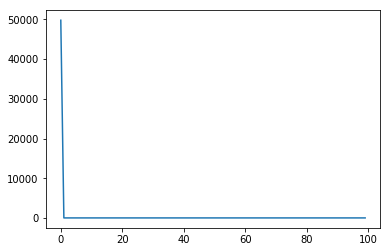

In [8]:
X_train, X_test, y_train, y_test = one_vs_one(X, y, 3, 5)

nn = nnet.NeuralNetwork(loss=ls.Hinge())
nn.add_layer( mdl.ModuleLinear(len(X[0]), 10) )
costs = nn.fit(X_train, y_train)

plt.plot(range(len(costs)), costs)
plt.show()

Stochastique

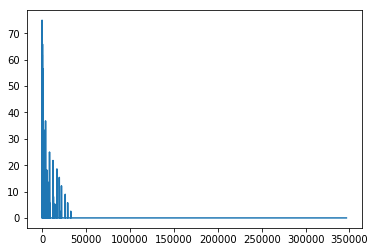

In [9]:
nn = nnet.NeuralNetwork(loss=ls.Hinge())
nn.add_layer( mdl.ModuleLinear(len(X[0]), 10) )
costs = nn.fit(X_train, y_train, mode="stoch")

plt.plot(range(len(costs)), costs)
plt.show()

### Régression logistique

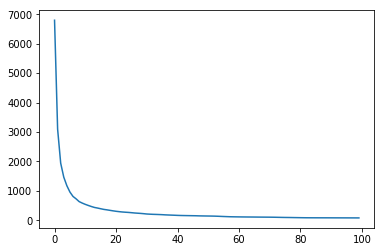

In [10]:
X_train, X_test, y_train, y_test = one_vs_one(X, y, 5, 7)

nn = nnet.NeuralNetwork(loss=ls.MSE())
nn.add_layer( [mdl.ModuleLinear(len(X[0]), 10), mdl.ActivationFunction(sigmoid, sigmoid_g)])
costs = nn.fit(X_train, y_train, mode='batch')

plt.plot(range(len(costs)), costs)
plt.show()

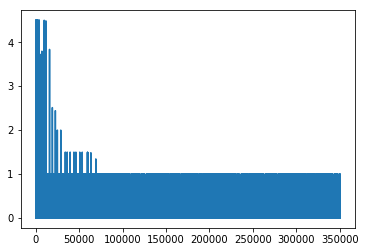

In [12]:
nn = nnet.NeuralNetwork(loss=ls.MSE())
nn.add_layer( [mdl.ModuleLinear(len(X[0]), 10), mdl.ActivationFunction(sigmoid, sigmoid_g)] )
costs = nn.fit(X_train, y_train, mode='stoch', epsilon=1e-1)

plt.plot(range(len(costs)), costs)
plt.show()

In [13]:
nn = nnet.NeuralNetwork(loss=ls.MSE())
nn.add_layer( [mdl.ModuleLinear(len(X[0]), 10), mdl.ActivationFunction(sigmoid, sigmoid_g)] )
costs = nn.fit(X_train, y_train, mode='mini_batch')

plt.plot(range(len(costs)), costs)
plt.show()

NameError: name 'batch_size' is not defined

----

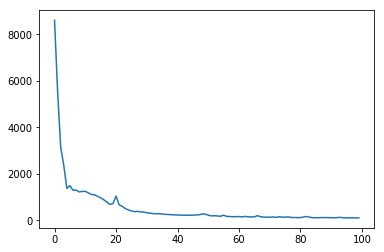

In [15]:
X_train, X_test, y_train, y_test = one_vs_one(X, y, 3, 5)

nn = nnet.NeuralNetwork(loss=ls.MSE())

model1 = mdl.ModuleLinear(len(X[0]), 15)
activ1 = mdl.ActivationFunction(tanh, tanh_g)
model2 = mdl.ModuleLinear(15, 10)
activ2 = mdl.ActivationFunction(sigmoid, sigmoid_g)

nn.add_layer([model1, activ1, model2, activ2])

costs = nn.fit(X_train, y_train)
#print(rnn.score(X, Y))

plt.plot(range(len(costs)), costs)
plt.show()

#print("Score :", f1_score( nn.forward(X_test), y_test ))

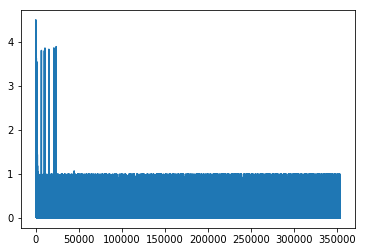

In [16]:
X_train, X_test, y_train, y_test = one_vs_one(X, y, 0, 8)

nn = nnet.NeuralNetwork(loss=ls.MSE())

model1 = mdl.ModuleLinear(len(X[0]), 15)
activ1 = mdl.ActivationFunction(tanh, tanh_g)
model2 = mdl.ModuleLinear(15, 10)
activ2 = mdl.ActivationFunction(sigmoid, sigmoid_g)

nn.add_layer([model1, activ1, model2, activ2])

costs = nn.fit(X_train, y_train, mode='stoch', epsilon=1e-1)
#print(rnn.score(X, Y))

plt.plot(range(len(costs)), costs)
plt.show()

#print("Score :", f1_score( nn.forward(X_test), y_test ))

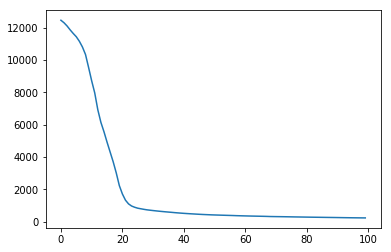

In [65]:
X_train, X_test, y_train, y_test = one_vs_one(X, y, 0, 8)

nn = nnet.NeuralNetwork(loss=ls.MSE())

model1 = mdl.ModuleLinear(len(X[0]), 15)
activ1 = mdl.ActivationFunction(tanh, tanh_g)
model2 = mdl.ModuleLinear(15, 10)
activ2 = mdl.ActivationFunction(sigmoid, sigmoid_g)

nn.add_layer([model1, activ1, model2, activ2])

costs = nn.fit(X_train, y_train, mode='mini_batch', epsilon=1e-3)
#print(rnn.score(X, Y))

plt.plot(range(len(costs)), costs)
plt.show()

#print("Score :", f1_score( nn.forward(X_test), y_test ))